In [1]:
library(ggplot2)
library(data.table)

In [3]:
graph_dt = fread("/Users/ebiederstedt/downloads/filtered10K_graph14_pairedFASTQs_subsample001_scores_identity.csv")
ref_dt = fread("/Users/ebiederstedt/downloads/ref_novflag_pairedFASTQs_k14_subsample001_scores_identity.csv")

Read 15570509 rows and 2 (of 2) columns from 0.145 GB file in 00:00:04
Read 15574930 rows and 2 (of 2) columns from 0.161 GB file in 00:00:05


In [4]:
print(dim(graph_dt)[1])                                                                                                                                                                                              
## 15570509                                                                                                                                                                                                          
                                                                                                                                                                                                                     
print(dim(ref_dt)[1])  
## 15574930

[1] 15570509
[1] 15574930


In [6]:
graph_dt[, type:='graph_subsample0.01']                                                                                                                                                                              
ref_dt[, type:='ref_subsample0.01']                                                                                                                                                                                  
                                        

In [7]:
print("graph_dt, mean scores ")                                                                                                                                                                                      
mean(graph_dt$scores)                                                                                                                                                                                                
print("ref_dt, mean scores ")                                                                                                                                                                                        
mean(ref_dt$scores)                                                                                                                                                                                                  
print("graph_dt, mean identity ")                                                                                                                                                                                    
mean(graph_dt$indentity)                                                                                                                                                                                             
print("ref_dt, mean identity ")                                                                                                                                                                                      
mean(ref_dt$indentity)                                                                                                                                                                                               
                            

[1] "graph_dt, mean scores "


[1] 108.8668

[1] "ref_dt, mean scores "


[1] 108.1045

[1] "graph_dt, mean identity "


[1] 0.991329

[1] "ref_dt, mean identity "


[1] 0.9891437

In [8]:
list_of_dts = list(graph_dt, ref_dt)   

In [9]:
final = Reduce(function(...) merge(..., all = TRUE), list_of_dts)                                                                                                                                                    
         

In [10]:
head(final)

indentity,scores,type
0.1881188,24,graph_subsample0.01
0.1881188,24,ref_subsample0.01
0.1881188,24,ref_subsample0.01
0.1881188,24,ref_subsample0.01
0.1881188,24,ref_subsample0.01
0.1881188,24,ref_subsample0.01


In [11]:
## misspelled "identity", indentity
final[, identity:= indentity]                                                                                                                                                                                        
final[, indentity := NULL]     

In [12]:
head(final)                                                                                                                                                                                                          
                                                                                                                                                                                                                     
min(final$scores)                                                                                                                                                                                                    
## 23                                                                                                                                                                                                                
                                                                                                                                                                                                                     
max(final$scores)   

scores,type,identity
24,graph_subsample0.01,0.1881188
24,ref_subsample0.01,0.1881188
24,ref_subsample0.01,0.1881188
24,ref_subsample0.01,0.1881188
24,ref_subsample0.01,0.1881188
24,ref_subsample0.01,0.1881188


[1] 23

[1] 111

In [13]:
pp = ggplot(final, aes(type, scores, fill=type)) + geom_boxplot() +                                                                                                                                                  
    labs(title= "GAM scores, Reference vs. Graph, subsample 0.01", x="type", y = "scores, from 23 to 111")  + theme(legend.position="none")                                                                          
                    

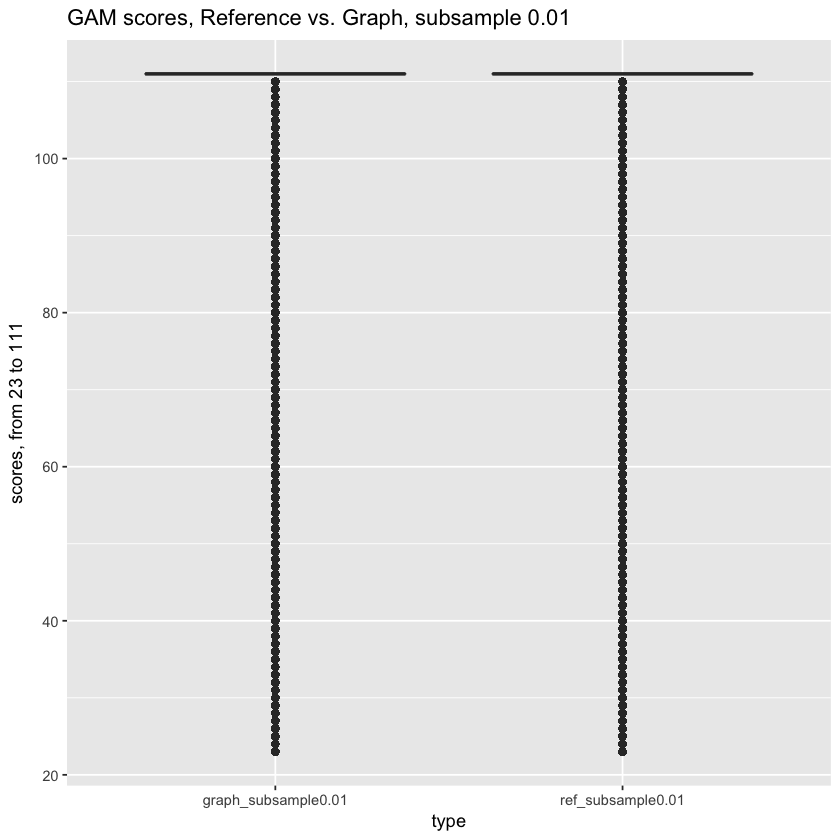

In [14]:
print(pp)

In [32]:
pp2 = ggplot(final, aes(type, scores, fill=type)) + geom_boxplot() + ylim(90, 120) +                                                                                                                                                 
    labs(title= "GAM scores, Reference vs. Graph, subsample 0.01", x="type", y = "scores, from 90 to 120")  + theme(legend.position="none")                                                                          
                    

ERROR: Error in FUN(X[[i]], ...): object 'scores' not found


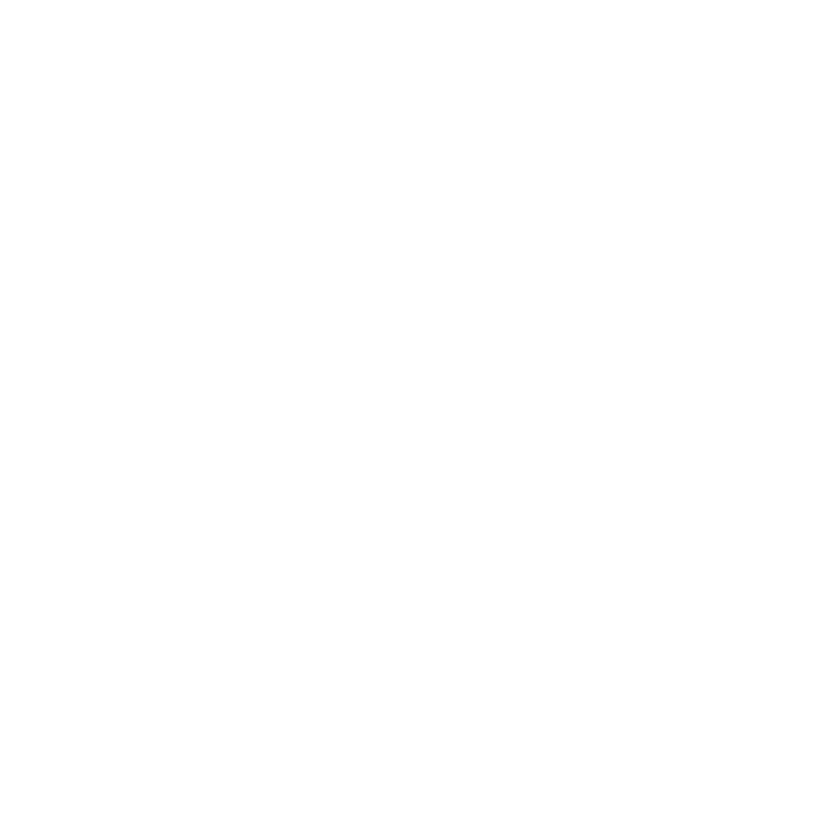

In [33]:
print(pp2)

In [16]:
print(min(final$identity))                                                                                                                                                                                                 
## 0.1881188                                                                                                                                                                                                         
                                                                                                                                                                                                                     
print(max(final$identity))                                                                                                                                                                                                
## 1                   

[1] 0.1881188
[1] 1


In [19]:
dd = ggplot(final, aes(type, identity, fill=type)) + geom_boxplot() + 
     labs(title= "GAM identity values, Reference vs. Graph, subsample 0.01", x="type", y = "scores, from 0.188 to 1.0")  + theme(legend.position="none")

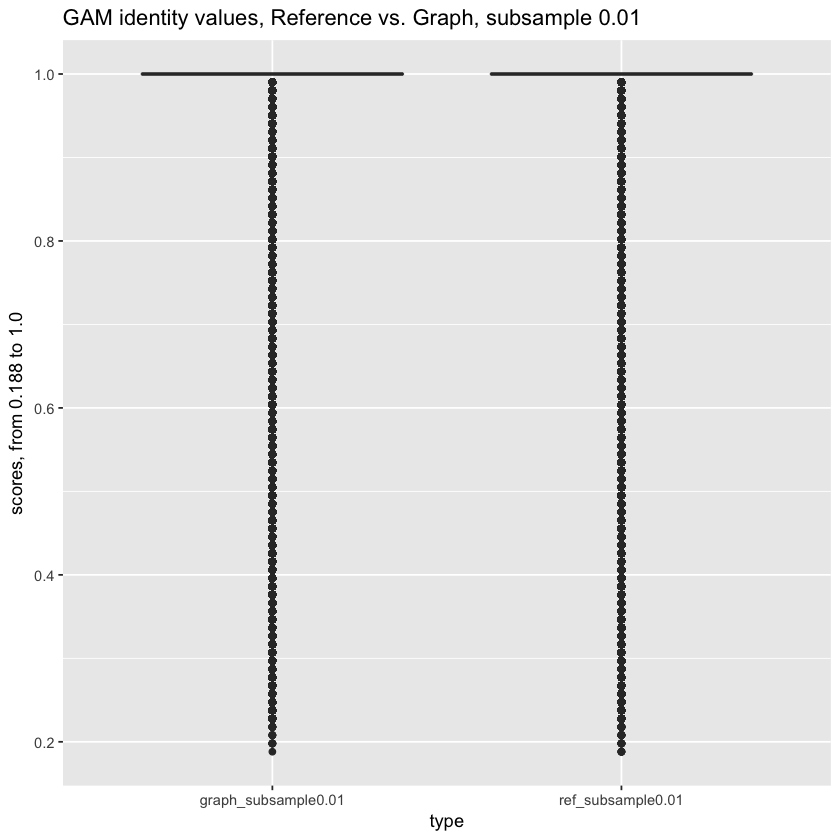

In [20]:
print(dd)

In [21]:
graph_map = fread("/Users/ebiederstedt/downloads/filtered10K_graph14_pairedFASTQs_subsample001_mapping_quality.csv")
ref_map = fread("/Users/ebiederstedt/downloads/ref_novflag_pairedFASTQs_k14_subsample001_mapping_quality.csv")

In [24]:
graph_map[, type:='graph_subsample0.01']                                                                                                                                                                              
ref_map[, type:='ref_subsample0.01']       

In [25]:
print(dim(graph_map)[1])  ### number of scores, identity values 
print(dim(ref_map)[1])

[1] 14348088
[1] 14391454


In [26]:
print("graph mapping quality")
print(mean(graph_map$V1))
print("ref mapping quality")
print(mean(ref_map$V1))

[1] "graph mapping quality"
[1] 58.83231
[1] "ref mapping quality"
[1] 59.04081


In [27]:
list_of_dts = list(graph_map, ref_map)

In [28]:
final = Reduce(function(...) merge(..., all = TRUE), list_of_dts)

In [34]:
final = final[, c('V1', 'type')]

In [35]:
final[, mapping_quality := V1]
final[, V1:=NULL]

In [36]:
head(final)

type,mapping_quality
graph_subsample0.01,1
graph_subsample0.01,1
graph_subsample0.01,1
graph_subsample0.01,1
graph_subsample0.01,1
graph_subsample0.01,1


In [37]:
max(final$mapping_quality)

[1] 60

In [39]:
min(final$mapping_quality)

[1] 1

In [40]:
dd = ggplot(final, aes(type, mapping_quality, fill=type)) + geom_boxplot() + 
     labs(title= "GAM mapping qualities, Reference vs. Graph, subsample 0.01", x="type", y = "Mapping Qualities, from 1 to 60")  + theme(legend.position="none")

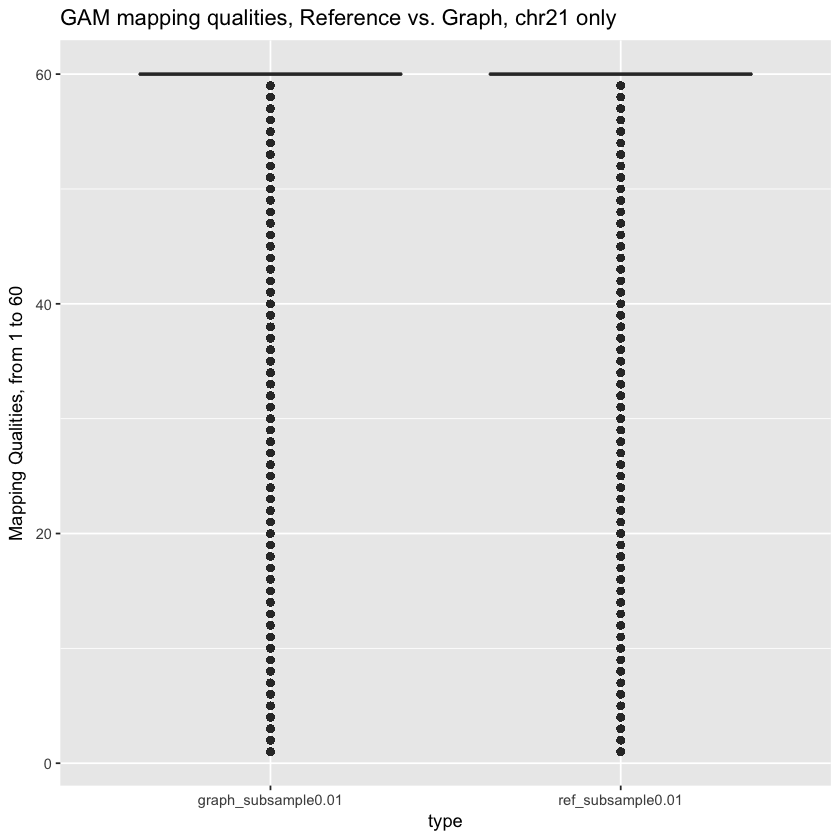

In [41]:
print(dd)

In [ ]:
## print(dim(graph_dt)[1])                                                                                                                                                                                              
## ## 15570509                                                                                                                                                                                                          
                                                                                                                                                                                                                     
## print(dim(ref_dt)[1])  
## ## 15574930

In [42]:
dt = data.table(type=c("GRAPH", "REFERENCE"),
                number_mappings=c(15570509, 15574930))

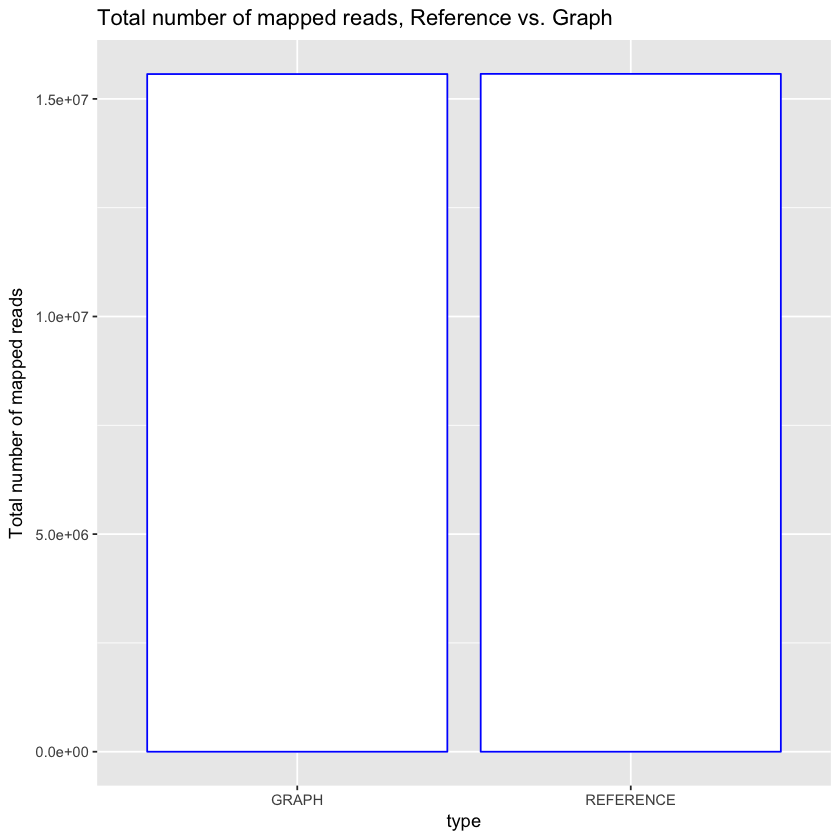

In [43]:
ggplot(data=dt, aes(x=type, y=number_mappings)) +
  geom_bar(stat="identity", color="blue", fill="white") +
  labs(title= "Total number of mapped reads, Reference vs. Graph", x="type", y = "Total number of mapped reads")

In [44]:
15570509 - 15574930

[1] -4421

In [45]:
graph_map[, mapping_quality := V1]
graph_map[, V1 := NULL]

ref_map[, mapping_quality := V1]
ref_map[, V1 := NULL]


In [48]:
aa = ggplot(graph_map, aes(x = mapping_quality)) + geom_density(fill = "steelblue") +
  geom_vline(aes(xintercept = mean(mapping_quality)), 
             linetype = "dashed", size = 0.6) +
  labs(title= "Density of mapping quality, Graph, subsample 0.01", x="mapping quality", y = "density")

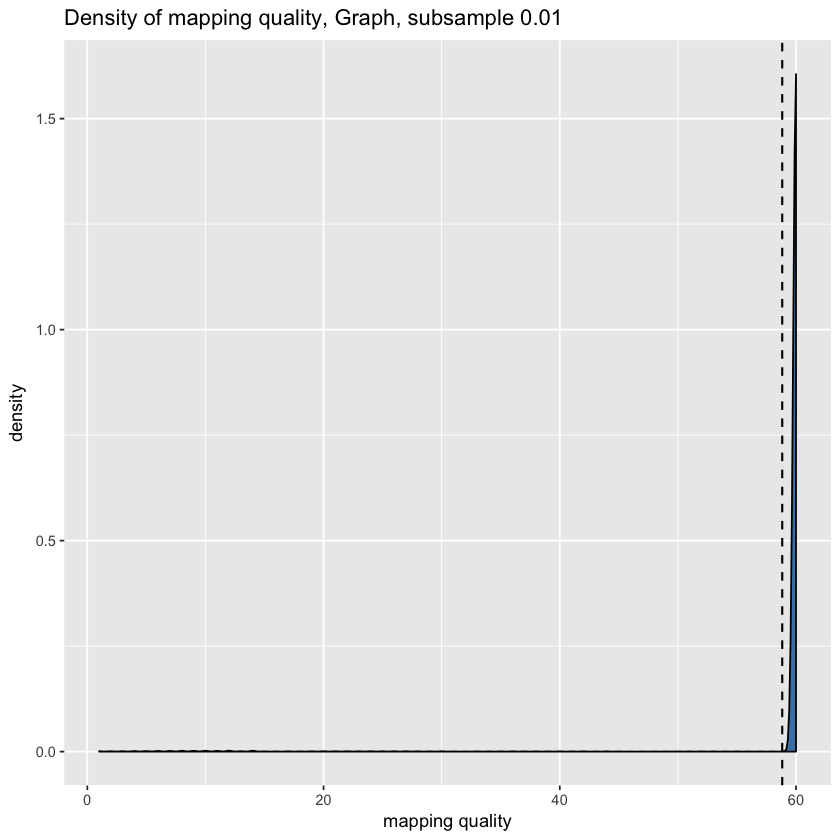

In [51]:
print(aa)

In [52]:
bb = ggplot(ref_map, aes(x = mapping_quality)) + geom_density( fill = "steelblue") +
  geom_vline(aes(xintercept = mean(mapping_quality)), 
             linetype = "dashed", size = 0.6) +
  labs(title= "Density of mapping quality, Reference, subsample 0.01", x="mapping quality", y = "density")

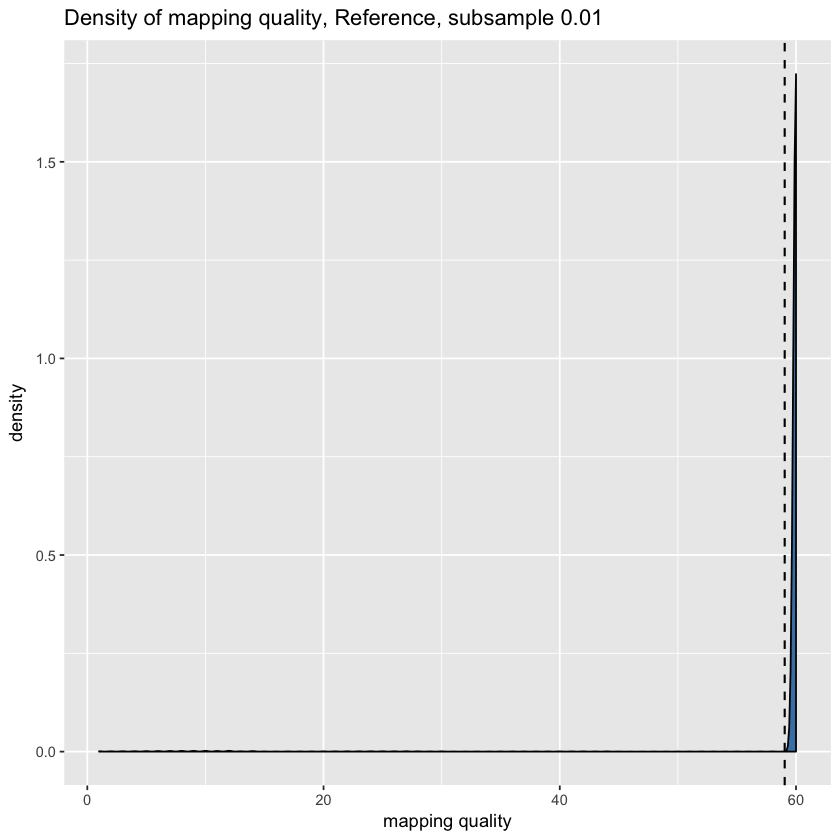

In [53]:
print(bb)